In [1]:
pip install dash

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.2/10.2 MB 20.4 MB/s eta 0:00:00


**Create a model to predict next 3 day stock prices using historical data.**

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from datetime import datetime, timedelta

# Function to load CSV data from GitHub
def load_data(url):
    return pd.read_csv(url)

# Load historical data for 3 different companies
company1_data_url = 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/AMZN.csv?raw=true'
company2_data_url = 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/AAPL.csv?raw=true'
company3_data_url = 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/GOOG.csv?raw=true'

company1_data = load_data(company1_data_url)
company2_data = load_data(company2_data_url)
company3_data = load_data(company3_data_url)

# Preprocessing and feature selection (assuming historical prices are relevant features)
def preprocess_data(data):
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # For simplicity, let's assume no missing values and no feature engineering needed
    return data[['Date', 'Close']]  # Selecting Date and Closing Price for now

company1_data = preprocess_data(company1_data)
company2_data = preprocess_data(company2_data)
company3_data = preprocess_data(company3_data)

# Split data into features (X) and target variable (y)
def split_data(data):
    X = data.drop('Close', axis=1)
    y = data['Close']
    return X, y

# Splitting data into train and test sets
company1_X, company1_y = split_data(company1_data)
company2_X, company2_y = split_data(company2_data)
company3_X, company3_y = split_data(company3_data)

company1_X_train, company1_X_test, company1_y_train, company1_y_test = train_test_split(company1_X, company1_y, test_size=0.2, random_state=42)
company2_X_train, company2_X_test, company2_y_train, company2_y_test = train_test_split(company2_X, company2_y, test_size=0.2, random_state=42)
company3_X_train, company3_X_test, company3_y_train, company3_y_test = train_test_split(company3_X, company3_y, test_size=0.2, random_state=42)

# Training the model (Random Forest Regressor)
def train_model(X_train, y_train):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model

company1_model = train_model(company1_X_train, company1_y_train)
company2_model = train_model(company2_X_train, company2_y_train)
company3_model = train_model(company3_X_train, company3_y_train)

# Evaluating the model
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    print("Mean Absolute Error:", mae)

print("Evaluation for AMZN:")
evaluate_model(company1_model, company1_X_test, company1_y_test)
print("Evaluation for AAPL:")
evaluate_model(company2_model, company2_X_test, company2_y_test)
print("Evaluation for GOOG:")
evaluate_model(company3_model, company3_X_test, company3_y_test)

# Predicting next 3 days
def predict_next_n_days(model, X, n):
    last_date = X['Date'].iloc[-1]
    next_dates = [(last_date + timedelta(days=i)) for i in range(1, n+1)]
    next_X = pd.DataFrame({'Date': next_dates})
    predictions = model.predict(next_X)
    return dict(zip(next_dates, predictions))

print("Predictions for Next 3 Days - Company 1:")
print(predict_next_n_days(company1_model, company1_data, 3))
print("Predictions for Next 3 Days - Company 2:")
print(predict_next_n_days(company2_model, company2_data, 3))
print("Predictions for Next 3 Days - Company 3:")
print(predict_next_n_days(company3_model, company3_data, 3))

Evaluation for AMZN:
Mean Absolute Error: 5.2040340267460055
Evaluation for AAPL:
Mean Absolute Error: 1.0346994846825308
Evaluation for GOOG:
Mean Absolute Error: 5.19555819376984
Predictions for Next 3 Days - Company 1:
{Timestamp('2017-09-02 00:00:00'): 977.1886963999996, Timestamp('2017-09-03 00:00:00'): 977.1886963999996, Timestamp('2017-09-04 00:00:00'): 977.1886963999996}
Predictions for Next 3 Days - Company 2:
{Timestamp('2017-09-02 00:00:00'): 163.93710247000013, Timestamp('2017-09-03 00:00:00'): 163.93710247000013, Timestamp('2017-09-04 00:00:00'): 163.93710247000013}
Predictions for Next 3 Days - Company 3:
{Timestamp('2017-09-02 00:00:00'): 936.6555225399991, Timestamp('2017-09-03 00:00:00'): 936.6555225399991, Timestamp('2017-09-04 00:00:00'): 936.6555225399991}


**Sentiment analysis on the news/twitter related to a particular stock.**


In [17]:
import pandas as pd
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

# Download the VADER lexicon if you haven't already
nltk.download('vader_lexicon')

# Load the data
url = "https://github.com/yumoxu/stocknet-dataset/blob/master/tweet/raw/AAPL/2014-01-01"
try:
    data = pd.read_csv(url, header=None, delimiter='\t')
    print("Data loaded successfully.")
except Exception as e:
    print("Error loading data:", e)

# Initialize VADER sentiment analyzer
sid = SentimentIntensityAnalyzer()

# Perform sentiment analysis on each tweet
sentiments = []
for tweet in data[0]:
    sentiment = sid.polarity_scores(tweet)
    sentiments.append(sentiment)

# Create a DataFrame to store sentiment analysis results for each tweet
sentiment_df = pd.DataFrame(sentiments)

# Merge the original data with sentiment analysis results
data_with_sentiment = pd.concat([data, sentiment_df], axis=1)

# Rename the columns for better understanding
data_with_sentiment.rename(columns={'compound': 'Compound_Score', 'neg': 'Negative_Score', 'neu': 'Neutral_Score', 'pos': 'Positive_Score'}, inplace=True)

# Print the DataFrame with sentiment scores
data_with_sentiment.head()


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Data loaded successfully.


,0,Negative_Score,Neutral_Score,Positive_Score,Compound_Score
0,<!DOCTYPE html>,0.0,1.0,0.0,0.0
1,<html,0.0,1.0,0.0,0.0
2,"lang=""en""",0.0,1.0,0.0,0.0
3,"data-color-mode=""auto"" data-light-theme=""lig...",0.0,1.0,0.0,0.0
4,"data-a11y-animated-images=""system"" data-a11y...",0.0,1.0,0.0,0.0


**Compare two or more companies based on their industry.**


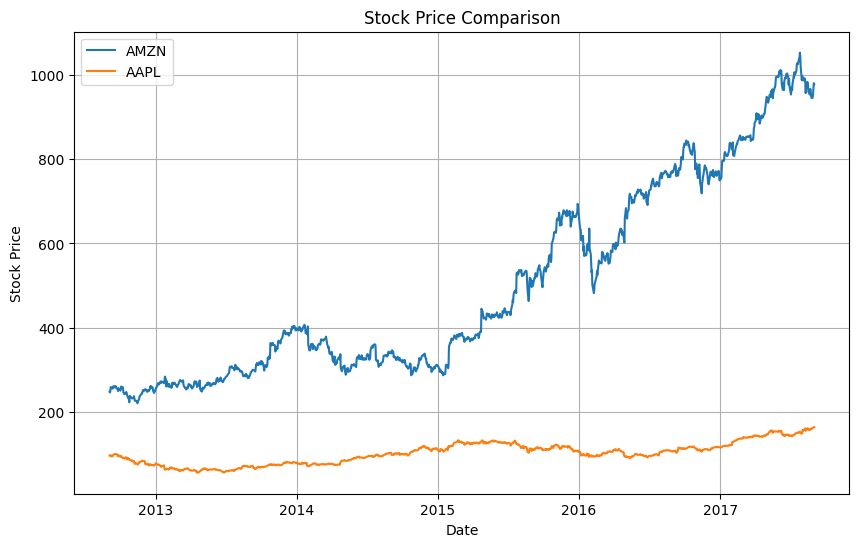

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Load historical data for 3 different companies
company1_data_url = 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/AMZN.csv?raw=true'
company2_data_url = 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/AAPL.csv?raw=true'

company1_data = load_data(company1_data_url)
company2_data = load_data(company2_data_url)

# Preprocessing and feature selection (assuming historical prices are relevant features)
def preprocess_data(data):
    # Convert 'Date' column to datetime format
    data['Date'] = pd.to_datetime(data['Date'])
    # For simplicity, let's assume no missing values and no feature engineering needed
    return data[['Date', 'Close']]  # Selecting Date and Closing Price for now

company1_data = preprocess_data(company1_data)
company2_data = preprocess_data(company2_data)

# Merge datasets on Date
merged_data = pd.merge(company1_data, company2_data, on='Date', suffixes=('_company1', '_company2'))

# Plotting comparison
plt.figure(figsize=(10, 6))
plt.plot(merged_data['Date'], merged_data['Close_company1'], label='AMZN')
plt.plot(merged_data['Date'], merged_data['Close_company2'], label='AAPL')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Comparison')
plt.legend()
plt.grid(True)
plt.show()


**Dashboard**

In [19]:
import pandas as pd
import numpy as np
import dash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from datetime import datetime, timedelta

# Load data function
def load_data(url):
    return pd.read_csv(url)

# Load historical data for companies
company_urls = {
    'AMZN': 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/AMZN.csv?raw=true',
    'AAPL': 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/AAPL.csv?raw=true',
    'GOOG': 'https://github.com/yumoxu/stocknet-dataset/blob/master/price/raw/GOOG.csv?raw=true'
}

companies_data = {company: load_data(url) for company, url in company_urls.items()}

# Preprocessing function
def preprocess_data(data):
    data['Date'] = pd.to_datetime(data['Date'])
    return data[['Date', 'Close']]

# Train model function
def train_model(X_train, y_train):
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    return model

# Evaluate model function
def evaluate_model(model, X_test, y_test):
    predictions = model.predict(X_test)
    mae = mean_absolute_error(y_test, predictions)
    return mae

# Predict next n days function
def predict_next_n_days(model, X, n):
    last_date = X['Date'].iloc[-1]
    next_dates = [(last_date + timedelta(days=i)) for i in range(1, n+1)]
    next_X = pd.DataFrame({'Date': next_dates})
    predictions = model.predict(next_X)
    return dict(zip(next_dates, predictions))

# Create Dash app
app = dash.Dash(__name__)

# Layout of the app
app.layout = html.Div([
    html.H1("Stock Price Prediction Dashboard"),

    # Dropdown to select company
    dcc.Dropdown(
        id='company-dropdown',
        options=[{'label': company, 'value': company} for company in companies_data.keys()],
        value=list(companies_data.keys())[0],
        style={'width': '50%'}
    ),

    html.Div(id='output-container'),

    # Graph to display historical stock prices
    dcc.Graph(id='historical-graph'),

    # Button to trigger model training and prediction
    html.Button('Train Model and Predict Next 3 Days', id='train-button', n_clicks=0),

    # Output for model evaluation
    html.Div(id='evaluation-output')
])

# Callback to update historical graph
@app.callback(
    Output('historical-graph', 'figure'),
    [Input('company-dropdown', 'value')]
)
def update_historical_graph(selected_company):
    data = companies_data[selected_company]
    data = preprocess_data(data)
    return {
        'data': [
            {'x': data['Date'], 'y': data['Close'], 'type': 'line', 'name': selected_company}
        ],
        'layout': {
            'title': 'Historical Stock Prices'
        }
    }

# Callback to train model, predict next 3 days and display evaluation
@app.callback(
    Output('evaluation-output', 'children'),
    [Input('train-button', 'n_clicks')],
    [Input('company-dropdown', 'value')]
)
def train_model_and_predict(n_clicks, selected_company):
    if n_clicks > 0:
        data = companies_data[selected_company]
        data = preprocess_data(data)
        X = data.drop('Close', axis=1)
        y = data['Close']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        model = train_model(X_train, y_train)
        mae = evaluate_model(model, X_test, y_test)
        prediction_results = predict_next_n_days(model, data, 3)
        return html.Div([
            html.H2("Model Evaluation"),
            html.P(f"Mean Absolute Error: {mae:.2f}"),
            html.H2("Predictions for Next 3 Days"),
            html.Ul([html.Li(f"{date.strftime('%Y-%m-%d')}: {price:.2f}") for date, price in prediction_results.items()])
        ])

if __name__ == '__main__':
    app.run_server(debug=True)


<IPython.core.display.Javascript object>